In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk, re, string
import warnings
warnings.filterwarnings("ignore")

# load the tweets file using read_csv function from Pandas Package

In [4]:
data = pd.read_csv('TwitterHate.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
data.info

<bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [6]:
data.describe

<bound method NDFrame.describe of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [7]:
data.shape

(31962, 3)

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [12]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

# get the tweets into a List for easy Text clean up and Manipulation

In [13]:
data = data[["label","tweet"]]

In [14]:
data.shape

(31962, 2)

In [16]:
data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [17]:
data.isnull().sum()

label    0
tweet    0
dtype: int64

# toClean:

## 1- Normalize the casing.

## 2- Using regular expressions, remove user handles. These begin with '@’.

## 3- Using regular expressions, remove URLs.

## 4- Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

## 5- Remove stop words.

## 6- Remove redundant terms like ‘amp’, ‘rt’, etc.

## 7-Remove ‘#’ symbols from the tweet while retaining the term.

In [24]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
from nltk.tokenize import TweetTokenizer

In [33]:
def preprocces_tweet_text(tweet):
    #normalize the casing:
    tweet.lower()
    
    tweet = re.sub('[^A-Za-z0-9]+', ' ', tweet)
    
    #remove user@ refernce and '#' from tweet:
    
    tweet = re.sub('\@\w+|\#', '', tweet)
    
    #remove urls:
    
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags = re.MULTILINE)
    
    #remove punctuation:
    
    tweet = tweet.translate(str.maketrans('','', string.punctuation))
    
    #Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
    tk = TweetTokenizer()
    tweet_tokens = tk.tokenize(tweet)
    
    #remove stopwords
    
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    ## Remove redundant terms like ‘amp’, ‘rt’, etc. 
    
    filtered_words_final = [w for w in filtered_words if not w in ("art", "rt")]
    
    return " ".join(filtered_words_final)
    

In [35]:
data.tweet = data['tweet'].apply(preprocces_tweet_text)

In [36]:
data.head()

,label,tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit use cause offer w...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


# Extra cleanup by removing terms with a length of 1

In [37]:
data["length"] = data["tweet"].apply(len)

In [38]:
data.head()

,label,tweet,length
0,0,user father dysfunctional selfish drags kids d...,60
1,0,user user thanks lyft credit use cause offer w...,87
2,0,bihday majesty,14
3,0,model love u take u time ur,27
4,0,factsguide society motivation,29


In [40]:
data.shape

(31962, 3)

In [45]:
len(data[data["length"] == 0])

11

In [46]:
len(data[data["length"] == 1])

2

In [47]:
len(data[data["length"] > 1])

31949

In [50]:
data[data["length"] == 0]

,label,tweet,length
3351,0,,0
7222,0,,0
10461,0,,0
13038,0,,0
15434,0,,0
16250,0,,0
20261,0,,0
22709,0,,0
25629,1,,0
29803,1,,0


In [51]:
data = data[data["length"] > 1]

In [52]:
data.head()

,label,tweet,length
0,0,user father dysfunctional selfish drags kids d...,60
1,0,user user thanks lyft credit use cause offer w...,87
2,0,bihday majesty,14
3,0,model love u take u time ur,27
4,0,factsguide society motivation,29


In [53]:
len(data)

31949

# Check out the top terms in the tweets:

## First, get all the tokenized terms into one large list.

## Use the counter and find the 10 most common terms.

In [58]:
def token_text(text):
    #tokeinze the text into list of words:
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

In [59]:
#final list with tokenized Words

tokenized_large = []

#itreating over each string in the data:
for x in data["tweet"]:
    #using the preprocess token_text function:
    token = token_text(x)
    
    tokenized_large.append(token)
    
flattened_tokenized_final = [i for j in tokenized_large  for i in j]    

In [62]:
type(flattened_tokenized_final)

list

In [65]:
# use the counter to finde the mose commen 10 terms

from collections import Counter
most_common_words = [word for word, word_count in Counter(flattened_tokenized_final).most_common(10)]
print(most_common_words)

['user', 'love', 'day', 'happy', 'u', 'life', 'time', 'like', 'today', 'new']


# Data formatting for predictive modeling:

## Join the tokens back to form strings. This will be required for the vectorizers.

## Assign x and y.

## Perform train_test_split using sklearn.

In [66]:
data.head()

,label,tweet,length
0,0,user father dysfunctional selfish drags kids d...,60
1,0,user user thanks lyft credit use cause offer w...,87
2,0,bihday majesty,14
3,0,model love u take u time ur,27
4,0,factsguide society motivation,29


In [67]:
x = data["tweet"]
y = data["label"]

In [75]:
# splitting the data into train and test set:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

## Import TF-IDF  vectorizer from sklearn.

## Instantiate with a maximum of 5000 terms in your vocabulary.

## Fit and apply on the train set.

## Apply on the test set.

In [76]:
# import Tf-IDF victorizer from sklearn:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
#instantiate with a maxium of 5000 terms in your vocabulary
tfidf_vect = TfidfVectorizer(max_features = 5000)

In [78]:
#fit and applay on the train set
x_train_tfidf = tfidf_vect.fit_transform(x_train)

In [79]:
#apply on the test set
x_test_tfidf = tfidf_vect.fit_transform(x_test)

# Model building: Ordinary Logistic Regression

## Instantiate Logistic Regression from sklearn with default parameters.

## Fit into  the train data.

## Make predictions for the train and the test set.

In [81]:
#instantiate logistic regression from sklearn 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [82]:
#fit into the train data:
lr.fit(x_train_tfidf, y_train)

LogisticRegression()

In [83]:
# make predictions for the train and the test set:
predictions_train = lr.predict(x_train_tfidf)
prediction_test = lr.predict(x_test_tfidf)

# Model evaluation: Accuracy, recall, and f_1 score.

## Report the accuracy on the train set.

## Report the recall on the train set: decent, high, or low.

## Get the f1 score on the train set.

In [84]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score

In [85]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5934
           1       0.23      0.01      0.01       456

    accuracy                           0.93      6390
   macro avg       0.58      0.50      0.49      6390
weighted avg       0.88      0.93      0.89      6390



In [86]:
print("Accuracy :" , accuracy_score(y_test, prediction_test))

Accuracy : 0.9275430359937402


In [87]:
print("Recall :", recall_score(y_test, prediction_test))

Recall : 0.006578947368421052


In [88]:
print("F1_score :", f1_score(y_test, prediction_test))

F1_score : 0.01279317697228145


# Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

## Adjust the appropriate class in the LogisticRegression model.

Text(0.5, 1.0, 'Distribution of labels')

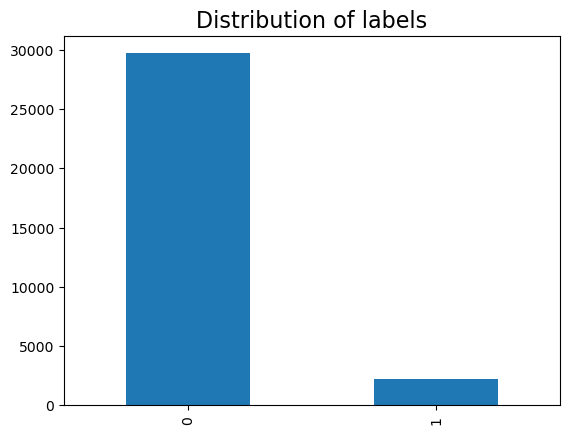

In [89]:
data["label"].value_counts().plot(kind= "bar")
plt.title('Distribution of labels', fontsize = 16)

In [91]:
#let us calculate the Distribution

data['label'].value_counts()/data.shape[0]

0    0.929888
1    0.070112
Name: label, dtype: float64

In [92]:
#defin the class weight again

w = {0:1, 1:92}
lr_2 = LogisticRegression(random_state = 11, class_weight = w)

# Train again with the adjustment and evaluate.

## Train the model on the train set.

## Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

In [93]:
lr_2.fit(x_train_tfidf, y_train)

LogisticRegression(class_weight={0: 1, 1: 92}, random_state=11)

In [94]:
predictions_2 = lr_2.predict(x_test_tfidf)

In [95]:
predictions_2

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [97]:
print("Accuracy :", accuracy_score(y_test, predictions_2))
print("Recall :", recall_score(y_test, predictions_2))
print("F1-Score :", f1_score(y_test, predictions_2))

Accuracy : 0.6843505477308294
Recall : 0.2741228070175439
F1-Score : 0.11027790030877814


# Regularization and Hyperparameter tuning:

## Import GridSearch and StratifiedKFold because of class imbalance.

## Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

## Use a balanced class weight while instantiating the logistic regression.

In [99]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [101]:
C_val = np.arange(0.5, 20.0, 0.5)
penalty_val = ["l1", "l2"]

In [102]:
hyperparam_grid = {"penalty" : penalty_val, "C":C_val}

In [104]:
lr_3 = LogisticRegression(random_state = 11, class_weight = w)

# Find the parameters with the best recall in cross validation.

## Choose ‘recall’ as the metric for scoring.

## Choose stratified 4 fold cross validation scheme.

## Fit into  the train set.

In [105]:
grid = GridSearchCV(lr_3, hyperparam_grid, scoring = "recall", cv = 4)

In [106]:
grid.fit(x_train_tfidf, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(class_weight={0: 1, 1: 92},
                                          random_state=11),
             param_grid={'C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

# What are the best parameters?

In [108]:
print(f"best recall: {grid.best_score_} with best param : {grid.best_params_}")

best recall: 0.9159192825112107 with best param : {'C': 0.5, 'penalty': 'l2'}


# Predict and evaluate using the best estimator.

## Use the best estimator from the grid search to make predictions on the test set.

## What is the recall on the test set for the toxic comments?

## What is the f_1 score?

In [114]:
lr_5 = LogisticRegression(random_state = 11,class_weight = w, C = 0.5, penalty = "l2")
lr_5.fit(x_train_tfidf, y_train)

LogisticRegression(C=0.5, class_weight={0: 1, 1: 92}, random_state=11)

In [115]:
lr_5_preds = lr_5.predict(x_test_tfidf)

In [116]:
print("Accuracy :", accuracy_score(y_test, lr_5_preds ))
print("Recall :", recall_score(y_test, lr_5_preds))
print("F1-Score :", f1_score(y_test, lr_5_preds))

Accuracy : 0.6067292644757434
Recall : 0.35964912280701755
F1-Score : 0.11545230552622315
